In [1]:
import os
os.chdir("F://buffalo//buffalo project//time_series")

In [28]:
%matplotlib inline
import matplotlib.pylab as plt
import pandas as pd
import statsmodels as sm
import numpy as np

In [11]:
data=pd.read_csv("LYNXdata.csv",header = 0,names =['year','trappings'],
                 parse_dates=[0],index_col =0)


In [12]:
data.head()

,trappings
year,
1821-01-01,269
1822-01-01,321
1823-01-01,585
1824-01-01,871
1825-01-01,1475


# converting pandas to series

In [14]:
data_series = pd.Series(data["trappings"].values,
                        index= pd.date_range('31/12/1821',
                        periods =114,
                        freq='A-DEC'))

In [15]:
data_series

1821-12-31     269
1822-12-31     321
1823-12-31     585
1824-12-31     871
1825-12-31    1475
1826-12-31    2821
1827-12-31    3928
1828-12-31    5943
1829-12-31    4950
1830-12-31    2577
1831-12-31     523
1832-12-31      98
1833-12-31     184
1834-12-31     279
1835-12-31     409
1836-12-31    2285
1837-12-31    2685
1838-12-31    3409
1839-12-31    1824
1840-12-31     409
1841-12-31     151
1842-12-31      45
1843-12-31      68
1844-12-31     213
1845-12-31     546
1846-12-31    1033
1847-12-31    2129
1848-12-31    2536
1849-12-31     957
1850-12-31     361
              ... 
1905-12-31    6313
1906-12-31    3794
1907-12-31    1836
1908-12-31     345
1909-12-31     382
1910-12-31     808
1911-12-31    1388
1912-12-31    2713
1913-12-31    3800
1914-12-31    3091
1915-12-31    2985
1916-12-31    3790
1917-12-31     674
1918-12-31      81
1919-12-31      80
1920-12-31     108
1921-12-31     229
1922-12-31     399
1923-12-31    1132
1924-12-31    2432
1925-12-31    3574
1926-12-31  

# dickey fuller test 

In [25]:
def stationary_test(timeseries):
    from statsmodels.tsa.stattools import adfuller
    print("Fuller Test are")
    df_test = adfuller(timeseries, autolag="AIC")
    df_output = pd.Series(df_test[0:4],index = ["Test Statistic", "p-value", "#Lags Used",
                                   "Number of Observations Used"])
    print(df_output)

In [26]:
stationary_test(data_series)

Fuller Test are
Test Statistic                  -2.996304
p-value                          0.035241
#Lags Used                       7.000000
Number of Observations Used    106.000000
dtype: float64


In [31]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

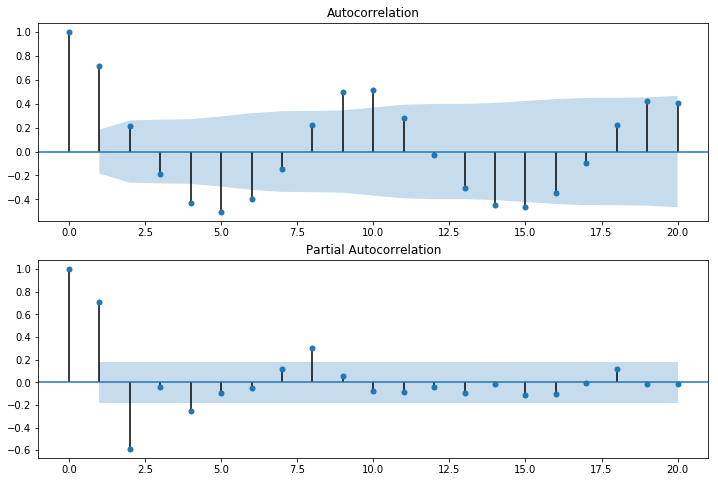

In [37]:
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(data_series,lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(data_series,lags=20,ax=ax2)


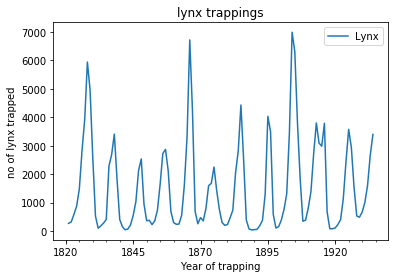

In [40]:
data_series.plot()
plt.title("lynx trappings")
plt.xlabel("Year of trapping")
plt.ylabel("no of lynx trapped")
plt.legend(['Lynx'])

In [42]:
cumsum = np.cumsum(data_series)
cumsum.head()

1821-12-31     269
1822-12-31     590
1823-12-31    1175
1824-12-31    2046
1825-12-31    3521
Freq: A-DEC, dtype: int64

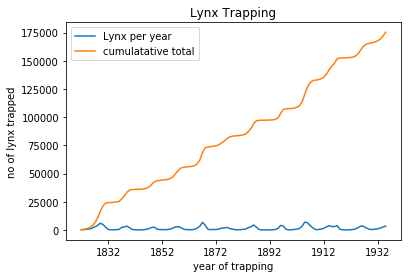

In [44]:
plt.plot(data_series)
plt.plot(cumsum)
plt.title('Lynx Trapping')
plt.xlabel("year of trapping")
plt.ylabel("no of lynx trapped")
plt.legend(['Lynx per year','cumulatative total'])

# subplots

Text(0.5,1,'Lynx Trapping')

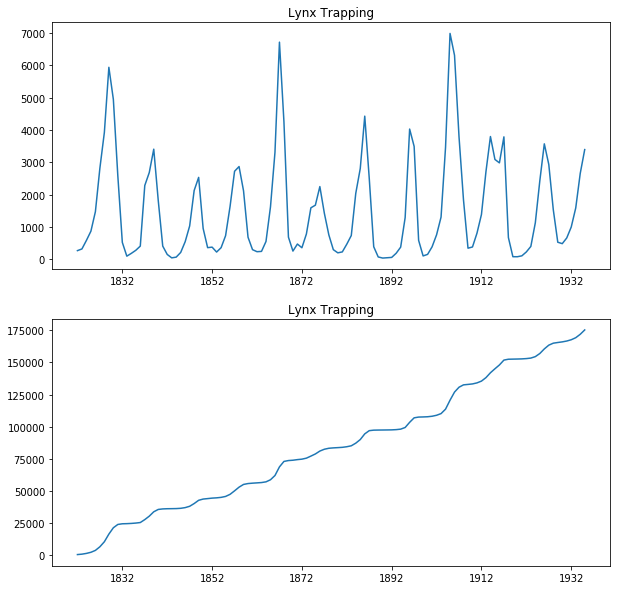

In [46]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(data_series)
plt.title("Lynx Trapping")

plt.subplot(2,1,2)
plt.plot(cumsum)
plt.title("Lynx Trapping")

